<a href="https://colab.research.google.com/github/junuimoon/DoitDeeplearning/blob/master/chapter_4_3_~_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [0]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

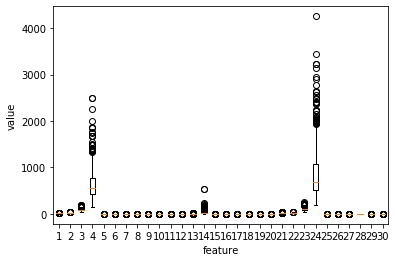

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [0]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [0]:
np.unique(cancer.target, return_counts = True)

(array([0, 1]), array([212, 357]))

In [0]:
# 0,1 두 가지의 타겟데이터만 존재, 그리고 두번째 어레이에서는 212개의 음성클래스와 357개의 양성클래스가 존재하고 있다는 것을 알려줌

In [0]:
x = cancer.data
y = cancer.target


사이킷런 이용하여 데이터 샘플 나누기

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.2, random_state=42)

In [0]:
# stratify=y 
#훈련 데이터를 나눌 때 클래스의 비율을 동일하게 만든다. 
#test_size = 0.2
# 훈련 데이터 쪼개는 함수는 기본적으로 3:1 비율로 쪼개는데, 이때 이 변수를 입력해서 조정할 수 있다. 위 사례는 20%만이 테스트 세트로 변환된다.


In [0]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [0]:
#unique함수로 훈련 세트의 타깃 확인하기
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

로지스틱 회귀 구현하기

In [0]:
class LogisticNeuron:

    def __init__(self):  # 입력 데이터의 특성이 많아서 미리 초기화하지 않은 상황임. 나중에 특성을 보고 결정할 것.
        self.w = None
        self.b = None
    
    def forpass(self, x):
        z = np.sum(x * self.w + self.b)
        return z

    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad



훈련하는 메서드 구현하기

1. fit 메서드, 2. activation 메서드

In [0]:
# fit 메서드는 기본적으로 뉴런 클래스와 비슷한 형식임. 하지만 활성화 함수가 추가된 것이 차이점.

def fit(self, x, y, epochs=100):                           
    self.w = np.ones(x.shape[1])                            # 가중치 초기화
    self.b = 0                                              # 절편 초기화
    for i in range(epochs):                                 # epochs만큼 반복
        for x_i, y_i in zip(x, y):                          # 모든 샘플에 대해 반복
            z = self.forpass(x_i)                           # 정방향 계산
            a = self.activation(z)                          # 활성화 함수
            err = -(y_i - a)                                # 오차 계산
            w_grad, b_grad = self.backprop(x_i, err)        # 역방향 계산
            self.w -= w_grad                                # 가중치 업데이트
            self.b -= b_grad                                # 절편 업데이트



In [0]:
def activation(self, z):
    a = 1 / ( 1 + np.exp(-z))
    return a

예측하는 메서드 구현하기

predict 메서드 구현하기

In [0]:
def predict(self,x):
    z = [self.forpass(x_i) for x_i in x]        #리스트 내포문으로, x의 행을 하나씩 꺼내어 곧바로 forpass 메서드에 적용하고, 결과를 이용하여 새 리스트로 만드는 과정.
    a = self.activation(np.array(z))
    return a > 0.5

최종본!

In [0]:
class LogisticNeuron:

    def __init__(self):  # 입력 데이터의 특성이 많아서 미리 초기화하지 않은 상황임. 나중에 특성을 보고 결정할 것.
        self.w = None
        self.b = None
    
    def forpass(self, x):
        z = np.sum(x * self.w + self.b)
        return z

    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad

    def fit(self, x, y, epochs=100):                           
        self.w = np.ones(x.shape[1])                            # 가중치 초기화
        self.b = 0                                              # 절편 초기화
        for i in range(epochs):                                 # epochs만큼 반복
            for x_i, y_i in zip(x, y):                          # 모든 샘플에 대해 반복
                z = self.forpass(x_i)                           # 정방향 계산
                a = self.activation(z)                          # 활성화 함수
                err = -(y_i - a)                                # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)        # 역방향 계산
                self.w -= w_grad                                # 가중치 업데이트
                self.b -= b_grad                                # 절편 업데이트

    def activation(self, z):
        a = 1 / ( 1 + np.exp(-z))
        return a


    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]        #리스트 내포문으로, x의 행을 하나씩 꺼내어 곧바로 forpass 메서드에 적용하고, 결과를 이용하여 새 리스트로 만드는 과정.
        a = self.activation(np.array(z))
        return a > 0.5

로지스틱 회귀 모델 훈련시키기

In [0]:
#1. 모델 훈련시키기

neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


In [0]:
#2. 테스트 세트 사용해 모델의 정확도 평가하기

np.mean(neuron.predict(x_test) == y_test)       #mean은 넘파이 배열의 평균값을 계산함. 즉 계산 결과 0.82가 나왔다는 것은 올바르게 예측한 샘플의 비율을 뜻하므로, 정확도가 82퍼센트란 소리임.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


0.8245614035087719

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.2, random_state=42)


class SingleLayer:

    def __init__(self): 
        self.w = None
        self.b = None
        self.lossess = []
    
    def forpass(self, x):
        z = np.sum(x * self.w + self.b)                                         #직선 방정식 계산
        return z

    def backprop(self, x, err):
        w_grad = x * err                                                        # 가중치에 대한 그레디언트 계산
        b_grad = 1 * err                                                        # 절편에 대한 그레디언트 계산
        return w_grad, b_grad

    def add_bias(self, x):                                                      # 행렬의 맨 앞에 1로 채워진 열 벡터를 추가한다.
        return np.c_[np.ones((x.shape[0], 1)), x]

    def fit(self, x, y, epochs=100):                                            
        self.w = np.ones(x.shape[1])                                            # 가중치를 초기화한다.           
        self.b = 0                                                              # 절편을 초기화한다.
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutatuon(np.arange(len(x)))                  # 인덱스를 섞는다.
            for i in indexes:                                                    
                z = self.forpass(x[i])                                      # 정방향 계산                   
                a = self.activation(z)                                      # 활성화 함수 적용
                err = -(y[i] - a)                                           # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)                   # 역방향 계산
                self.w -= w_grad                                            # 가중치 업데이트
                self.b -= b_grad                                            # 절편 업데이트
                a = np.clip(a, 1e-10, 1-1e-10)                              # 안전한 로그 게산을 위해서 클리핑한 후에 손실을 누적한다.
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))              # 에포크마다 평균 손실을 저장한다.
            self.losses.append(loss/len(y))
        
    def activation(self, z):
        a = 1 / ( 1 + np.exp(-z))
        return a


    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]                                    # 정방향 계산
        return np.array(z) > 0                                                  # 스텝 함수 적용
       
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [7]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

AttributeError: ignored